In [23]:
# @title Impoting Libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# @title Load Dataset from Local directory
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data (1).csv


In [ ]:
# @title Load Dataset
dataset = pd.read_csv('stock_data.csv')

In [ ]:
# @title Prepare data
dataset['Date'] = pd.to_datetime(dataset['Unnamed: 0'])
dataset['Days'] = (dataset['Date'] - dataset['Date'].min()).dt.days
X = dataset[['Days']].values
y = dataset['Stock_1'].values

In [ ]:
# @title Scale data
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

In [ ]:
# @title Train SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_scaled, y_scaled)

SVR(C=100, gamma=0.1)

In [ ]:
# @title Predict
y_pred_scaled = svr.predict(X_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

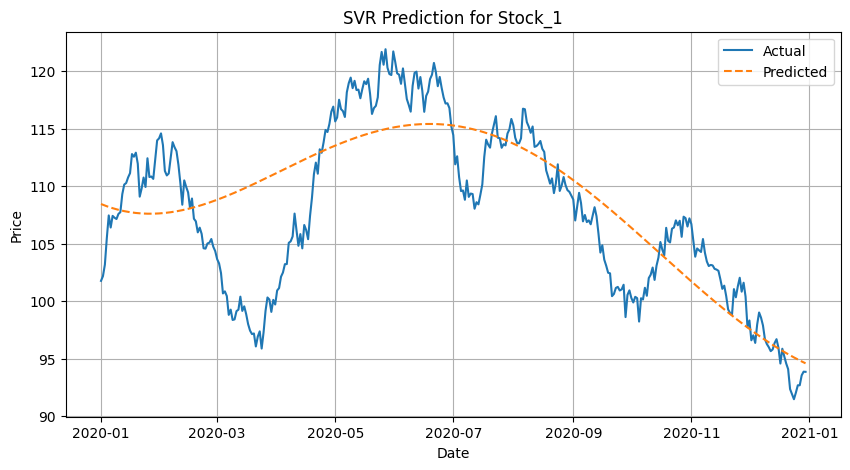

In [ ]:
# @title Plot
plt.figure(figsize=(10, 5))
plt.plot(dataset['Date'], y, label='Actual')
plt.plot(dataset['Date'], y_pred, label='Predicted', linestyle='--')
plt.title('SVR Prediction for Stock_1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()